In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../"*3)
import warnings
warnings.filterwarnings('ignore')

In [3]:
from quantumnetworks import MultiModeSystem, plot_full_evolution
import numpy as np

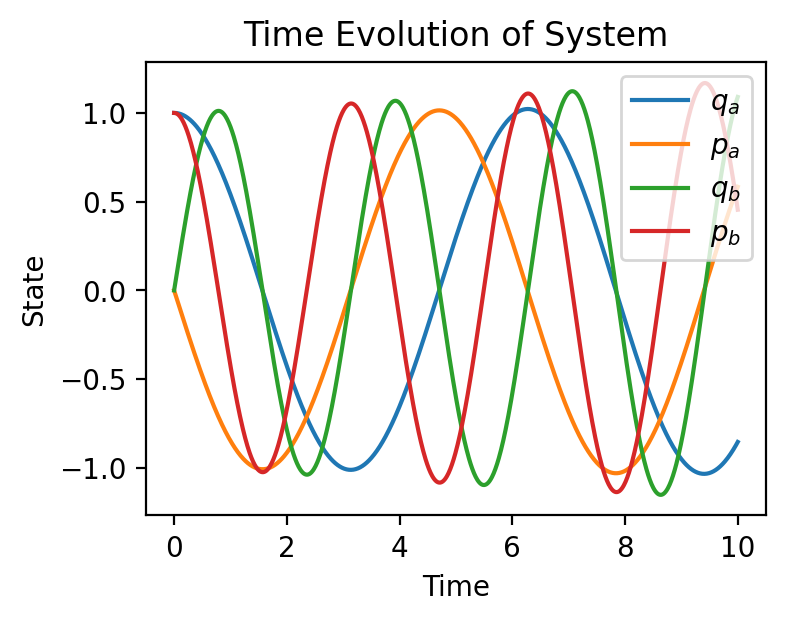

In [4]:
# params stored in txt
sys = MultiModeSystem(params={"dir":"data/"})
x_0 = np.array([1,0,0,1])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

In [5]:
u = sys.eval_u(0)
sys.eval_Jf(x_0, u)

array([[-1.500e-03,  1.002e+00,  0.000e+00,  2.000e-03],
       [-1.006e+00, -1.500e-03, -2.000e-03,  0.000e+00],
       [ 0.000e+00,  2.000e-03, -3.500e-03,  2.006e+00],
       [-2.000e-03,  0.000e+00, -2.002e+00, -3.500e-03]])

In [6]:
sys.eval_Jf_numerical(x_0, u)

array([[-1.50000000e-03,  1.00200000e+00,  0.00000000e+00,
         2.00000000e-03],
       [-1.00600000e+00, -1.50000012e-03, -2.00000017e-03,
         0.00000000e+00],
       [ 0.00000000e+00,  2.00000017e-03, -3.49999585e-03,
         2.00600001e+00],
       [-2.00000001e-03,  0.00000000e+00, -2.00200000e+00,
        -3.50000001e-03]])

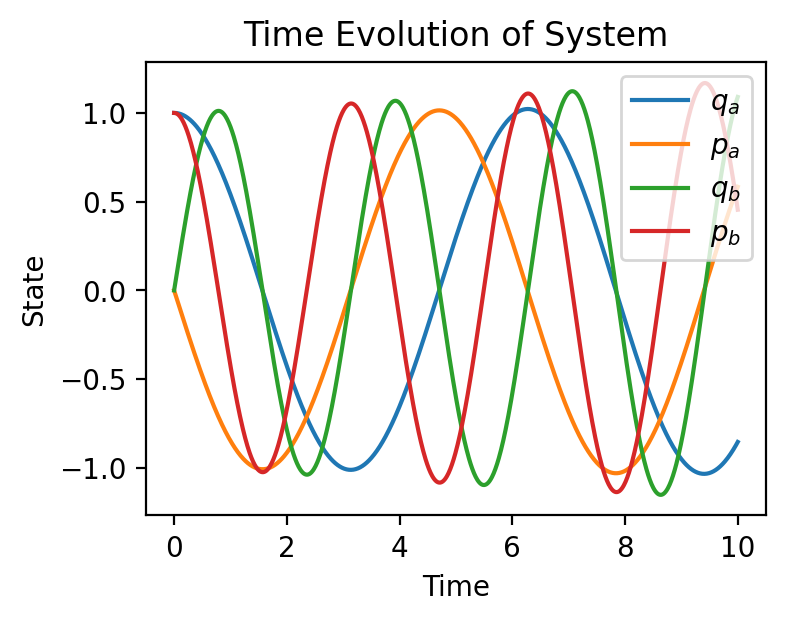

In [7]:
# params directly provided
omegas = [1,2]
kappas = [0.001,0.005]
gammas = [0.002,0.002]
kerrs = [0.001, 0.001]
couplings = [[0,1,0.002]]
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings})
x_0 = np.array([1,0,0,1])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

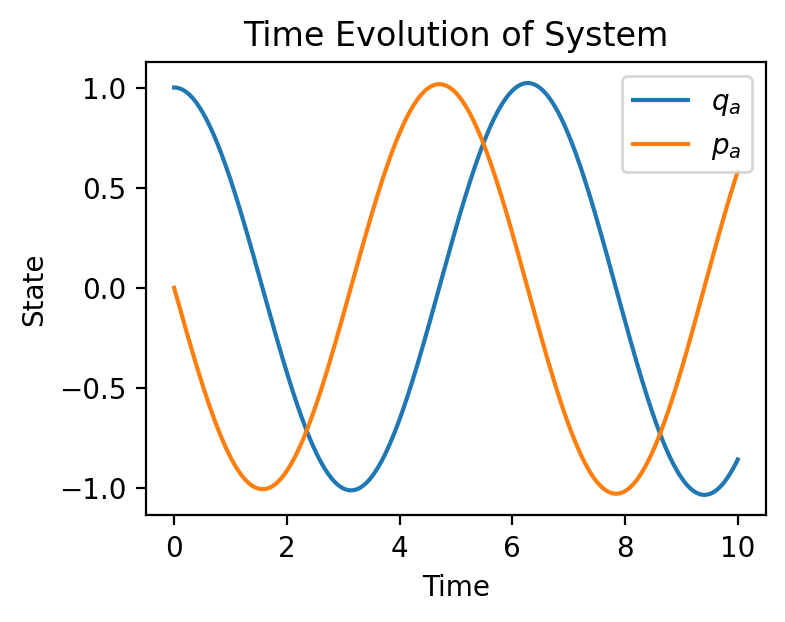

In [8]:
# single mode system
omegas = [1]
kappas = [0.001]
gammas = [0.002]
kerrs = [0.001]
couplings = []
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas,"gammas":gammas,"kerrs":kerrs,"couplings":couplings})
x_0 = np.array([1,0])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [9]:
# params directly provided
omegas = [1,2,1]
kappas = [0.001,0.005,0.001]
gammas = [0.002,0.002,0.002]
kerrs = [0.001, 0.001, 0.001]
couplings = [[0,1,0.002],[1,2,0.002]]
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "couplings":couplings})
print(sys.A)
# x_0 = np.array([1,0,0,1])
# ts = np.linspace(0, 10, 1001)
# X = sys.forward_euler(x_0, ts)
# fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
# ax.legend()

[[-1.5e-03  1.0e+00  0.0e+00  2.0e-03  0.0e+00  0.0e+00]
 [-1.0e+00 -1.5e-03 -2.0e-03  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  2.0e-03 -3.5e-03  2.0e+00  0.0e+00  2.0e-03]
 [-2.0e-03  0.0e+00 -2.0e+00 -3.5e-03 -2.0e-03  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  2.0e-03 -1.5e-03  1.0e+00]
 [ 0.0e+00  0.0e+00 -2.0e-03  0.0e+00 -1.0e+00 -1.5e-03]]


# Linearization

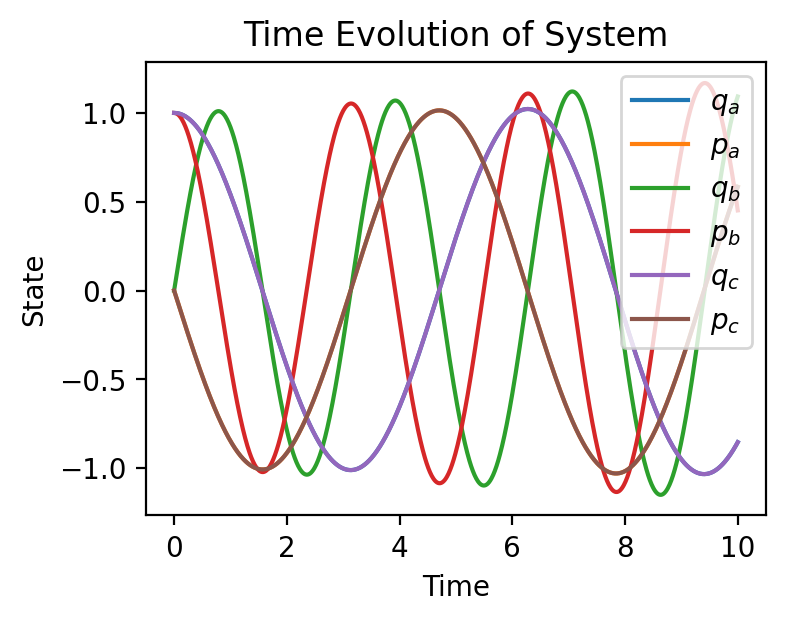

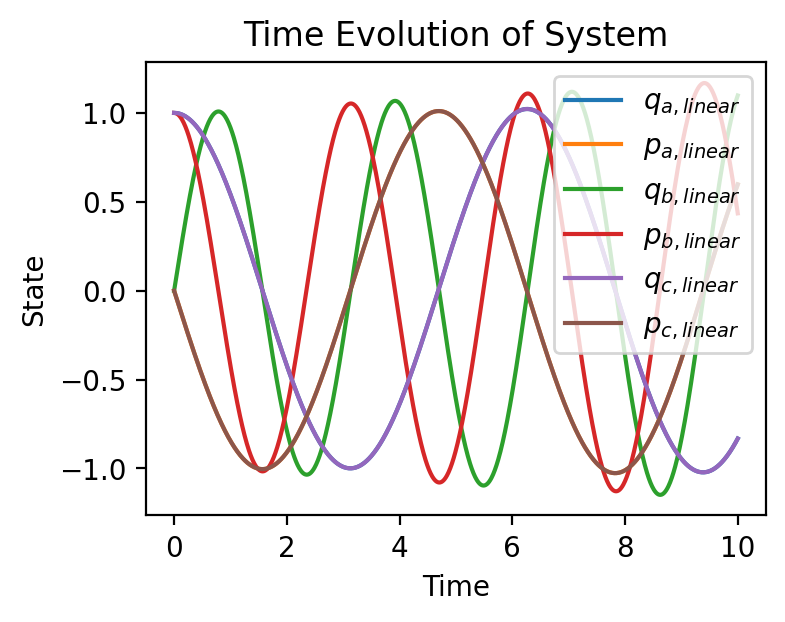

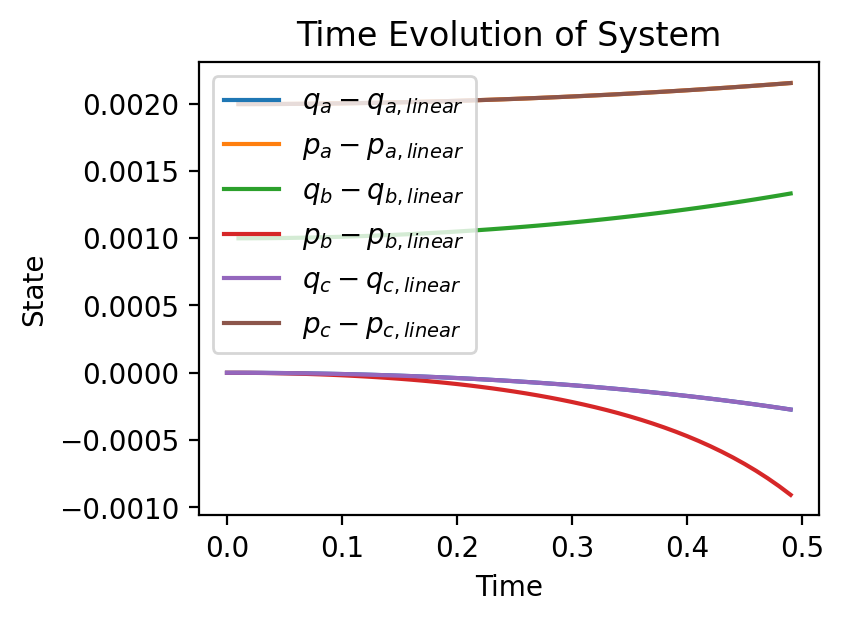

In [10]:
omegas = [1,2,1]
kappas = [0.001,0.005,0.001]
gammas = [0.002,0.002,0.002]
kerrs = [0.001, 0.001, 0.001]
couplings = [[0,1,0.002],[1,2,0.002]]
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "couplings":couplings})

x_0 = np.array([1,0, 0,1, 1,0])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$", "$q_c$","$p_c$"])
ax.legend()

X_linear = sys.forward_euler_linear(x_0, ts, x_0, 0)
fig, ax = plot_full_evolution(X_linear, ts, labels=["$q_{a,linear}$","$p_{a,linear}$","$q_{b,linear}$","$p_{b,linear}$","$q_{c,linear}$","$p_{c,linear}$"])

Delta_X = (X-X_linear)/X
plot_full_evolution(Delta_X[:,:50], ts[:50], labels=["$q_a - q_{a,linear}$","$p_a - p_{a,linear}$","$q_b - q_{b,linear}$","$p_b - p_{b,linear}$","$q_c - q_{c,linear}$","$p_c - p_{c,linear}$"])
ax.legend()